# **B5W1: Predicting Price Moves with News Sentiment**

## **Week 2**

### **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import sys
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

### **Loading data**

In [3]:
from scripts.RawAnalysis import RawAnalysis

analyzer = RawAnalysis()
df = analyzer.load_data('../data/raw_analyst_ratings.csv')

✅ Successfully loaded dataset: ../data/raw_analyst_ratings.csv


### **Head line Basic stat**

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [5]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
unique_stocks = df['stock'].unique().tolist()
print(unique_stocks)
num_unique_stocks = df['stock'].nunique()
print(f"Number of distinct stocks: {num_unique_stocks}")

['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AFB', 'AFC', 'AFCB', 'AFFX', 

In [7]:
df.shape

(1407328, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [9]:
# Basic statistics for numeric columns
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [10]:
# Count of missing values
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [11]:
invalid_dates = df[df['date'].isna()]
print(invalid_dates[['headline', 'url']].head())

Empty DataFrame
Columns: [headline, url]
Index: []


In [12]:
#convert date format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [13]:
# Count of missing values
df.isnull().sum()

Unnamed: 0          0
headline            0
url                 0
publisher           0
date          1351341
stock               0
dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [15]:
df['date']

0         2020-06-05 10:30:54-04:00
1         2020-06-03 10:45:20-04:00
2         2020-05-26 04:30:07-04:00
3         2020-05-22 12:45:06-04:00
4         2020-05-22 11:38:59-04:00
                     ...           
1407323                         NaT
1407324                         NaT
1407325                         NaT
1407326                         NaT
1407327                         NaT
Name: date, Length: 1407328, dtype: datetime64[ns, UTC-04:00]

In [16]:
headlines = df['headline']

In [17]:
analyzer.character_stats(headlines)

Character Length Statistics:
Mean: 73.12
Median: 64.0
Min: 3
Max: 512
Standard Deviation: 40.74


In [18]:
char_lengths = headlines.str.len()

print("Character Lengths:")
print(f"Mean: {char_lengths.mean():.2f}")
print(f"Median: {char_lengths.median()}")
print(f"Min: {char_lengths.min()}")
print(f"Max: {char_lengths.max()}")
print(f"Standard Deviation: {char_lengths.std():.2f}")


Character Lengths:
Mean: 73.12
Median: 64.0
Min: 3
Max: 512
Standard Deviation: 40.74


In [19]:
analyzer.character_stats()

TypeError: RawAnalysis.character_stats() missing 1 required positional argument: 'headlines'

In [ ]:
word_lengths = headlines.str.split().str.len()

print("\nWord Count:")
print(f"Mean: {word_lengths.mean():.2f}")
print(f"Median: {word_lengths.median()}")
print(f"Min: {word_lengths.min()}")
print(f"Max: {word_lengths.max()}")
print(f"Standard Deviation: {word_lengths.std():.2f}")



Word Count:
Mean: 11.42
Median: 10.0
Min: 1
Max: 77
Standard Deviation: 6.35


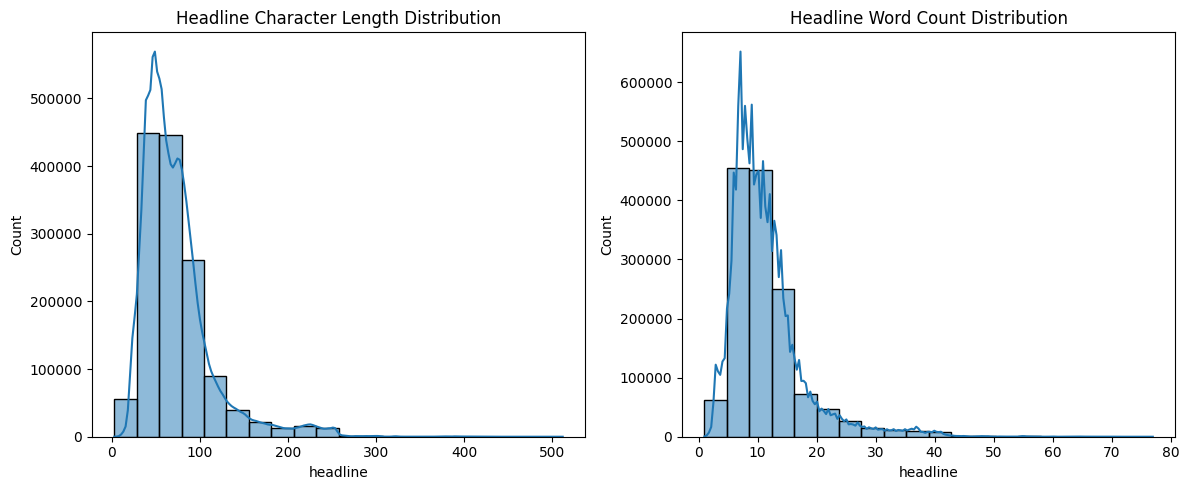

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(char_lengths, bins=20, kde=True)
plt.title("Headline Character Length Distribution")

plt.subplot(1, 2, 2)
sns.histplot(word_lengths, bins=20, kde=True)
plt.title("Headline Word Count Distribution")

plt.tight_layout()
plt.show()


In [ ]:
headlines

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

In [ ]:
invalid_dates = df[df['date'].isna()]

📊 Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


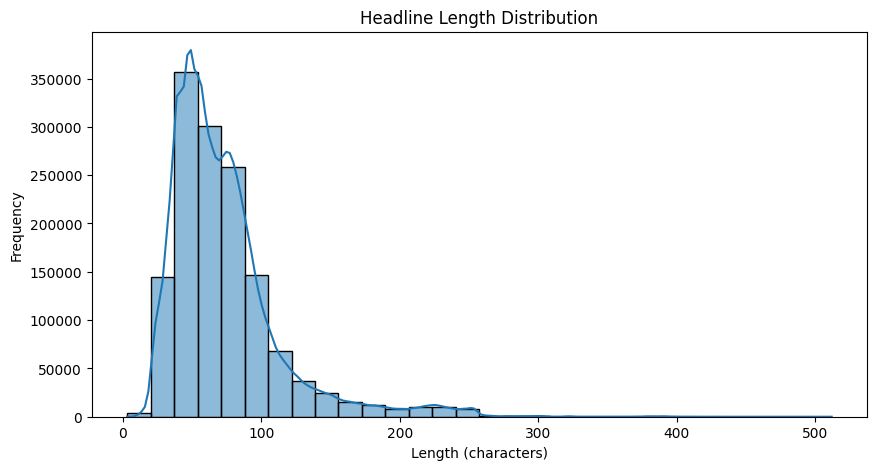

In [ ]:
analyzer.headline_length_stats(df)

In [ ]:
print(invalid_dates[['headline', 'url', 'publisher', 'date']])

                                                  headline  \
10         30 Stocks Moving in Friday's Pre-Market Session   
11       SVB Leerink Maintains Outperform on Agilent Te...   
12       8 Stocks Moving In Thursday's After-Hours Session   
13       Agilent Technologies shares are trading higher...   
14       Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...                                                    ...   
1407323             Top Narrow Based Indexes For August 29   
1407324  Recap: Wednesday's Top Percentage Gainers and ...   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326  Oppenheimer Initiates China Zenix At Outperfor...   
1407327  China Zenix Auto International Opens For Tradi...   

                                                       url  \
10       https://www.benzinga.com/news/20/05/16092879/3...   
11       https://www.benzinga.com/news/20/05/16092270/s...   
12       https://www.benzinga.com/news/20/05/16089803/8...   
13     

In [ ]:
# Count of Nat Rows
print(f"Total invalid dates: {df['date'].isna().sum()}")

Total invalid dates: 1351341


In [ ]:
missing_rows = df[df['date'].isnull()]
print(f"❗ Rows with missing date: {len(missing_rows)}")


❗ Rows with missing date: 1351341


📊 Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


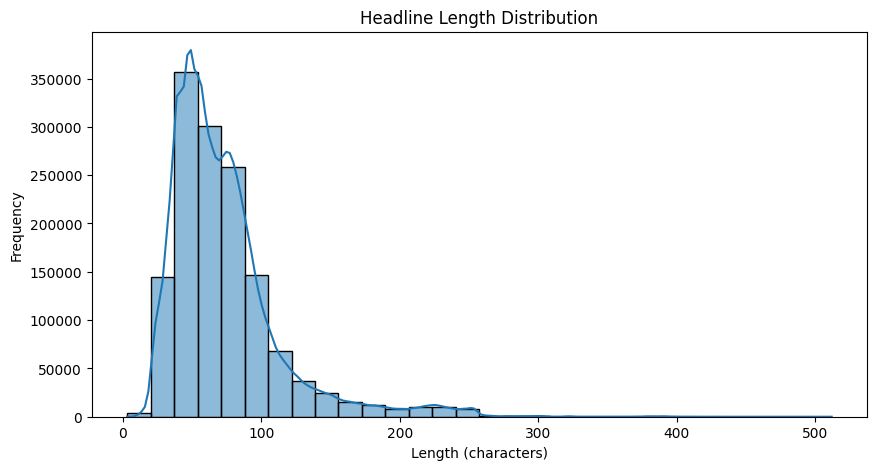

In [ ]:
analyzer.headline_length_stats(df)

## **Number of Articles per publishers**

📰 Top Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


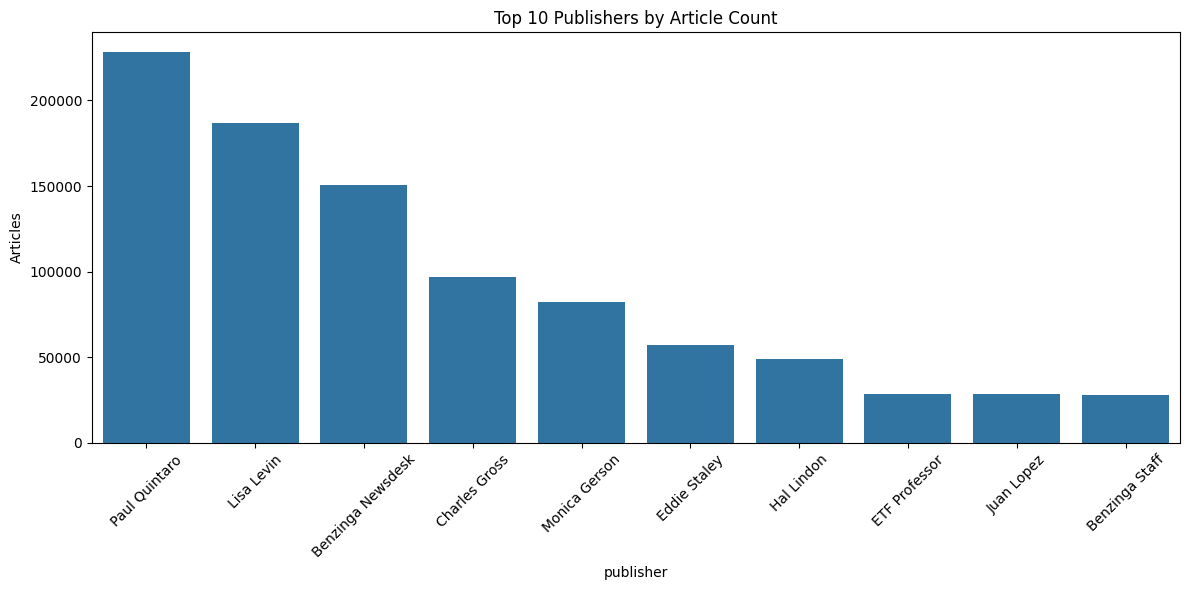

In [ ]:
analyzer.articles_per_publisher(df)

📰 Top Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


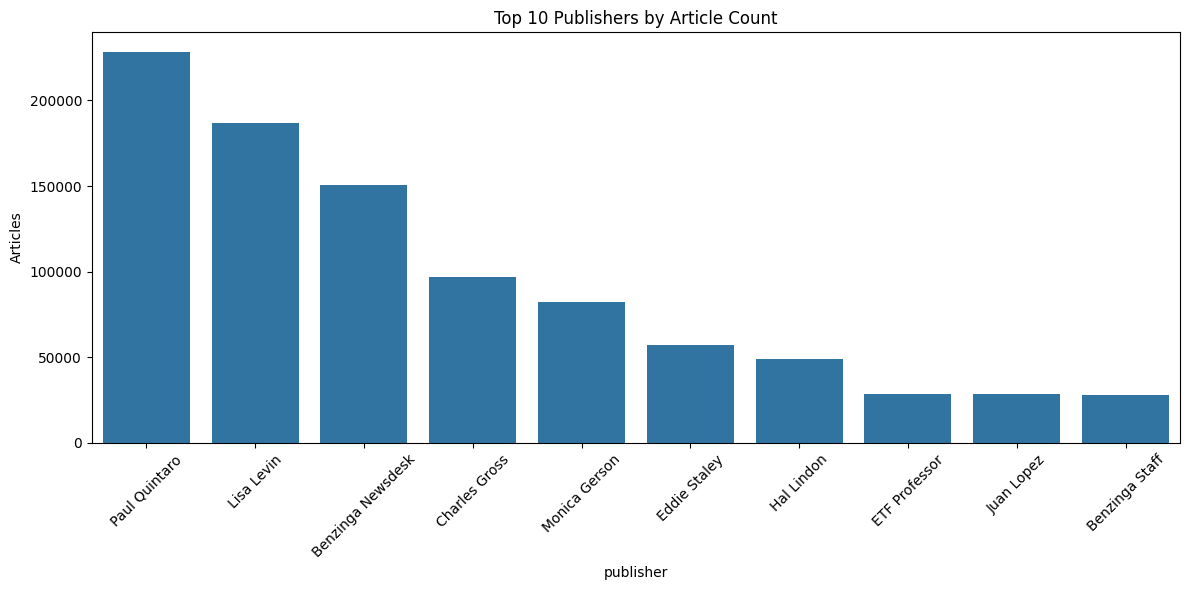

In [ ]:
analyzer.articles_per_publisher(df)

## **Analyze publish date**

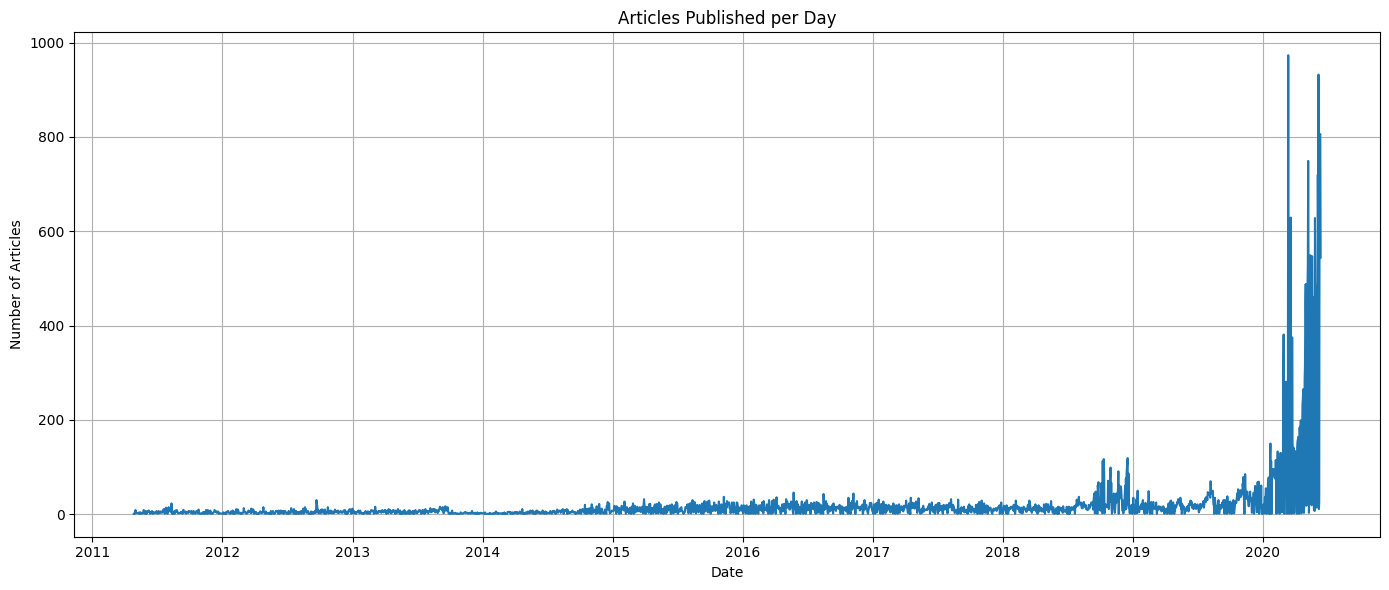

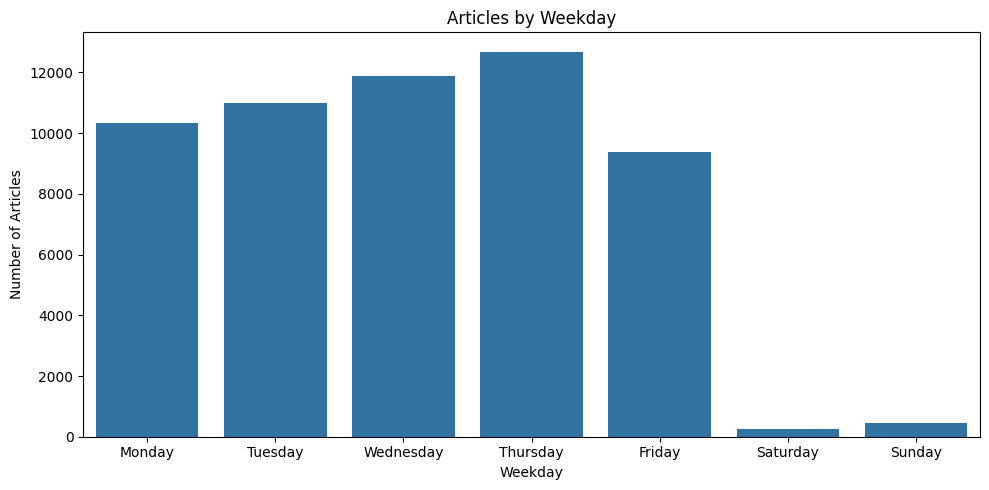

In [ ]:
analyzer.publication_trends(df)

#### **Text Analysis(Topic Modeling):**

In [ ]:
# Download stopwords if not already
nltk.download('stopwords')

# Sample headlines (use your DataFrame)
headlines = df['headline'].dropna().astype(str)

# Preprocess: remove common stopwords, lowercase
stop_words = set(stopwords.words('english'))

# Initialize CountVectorizer for unigrams + bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit-transform the headlines
X = vectorizer.fit_transform(headlines)

# Sum word counts
sum_words = X.sum(axis=0)

# Map words to frequencies
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort by frequency
sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display top N phrases
top_n = 15
print(f"Top {top_n} Keywords & Phrases:")
for word, freq in sorted_words[:top_n]:
    print(f"{word}: {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Top 15 Keywords & Phrases:
vs: 162099
stocks: 161776
est: 140604
eps: 128897
market: 120558
shares: 114313
reports: 108710
update: 91723
earnings: 87399
sales: 79645
benzinga: 74516
pt: 73068
week: 69572
announces: 66591
price: 64407


### **Time Series Analysis:**

c:\Users\girmachew\B5W1_Predicting_Price_Moves_with_News_Sentiment\scripts\RawAnalysis.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'hour'] = df[datetime_col].dt.hour


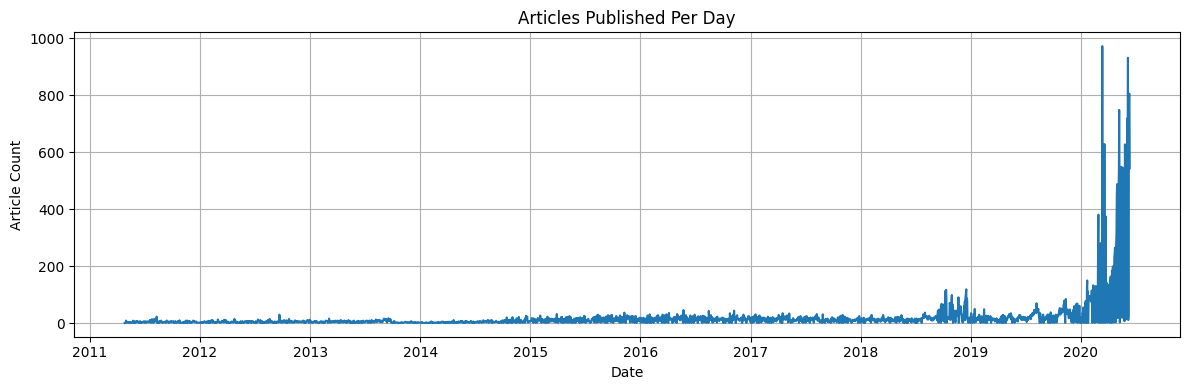

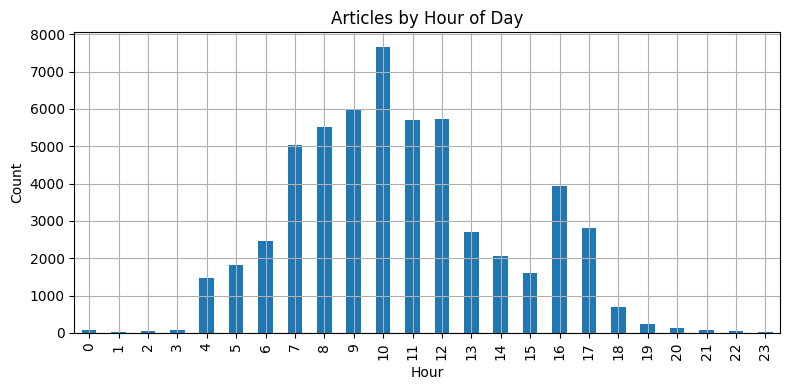

{'daily_counts': date
 2011-04-27      1
 2011-04-28      2
 2011-04-29      2
 2011-04-30      1
 2011-05-01      1
              ... 
 2020-06-07     25
 2020-06-08    765
 2020-06-09    804
 2020-06-10    806
 2020-06-11    544
 Length: 2528, dtype: int64,
 'hourly_counts': hour
 0       67
 1       14
 2       57
 3       93
 4     1469
 5     1829
 6     2476
 7     5033
 8     5527
 9     5965
 10    7669
 11    5701
 12    5732
 13    2710
 14    2075
 15    1612
 16    3939
 17    2800
 18     704
 19     227
 20     131
 21      82
 22      48
 23      27
 dtype: int64}

In [ ]:
analyzer.time_series_analysis(df)

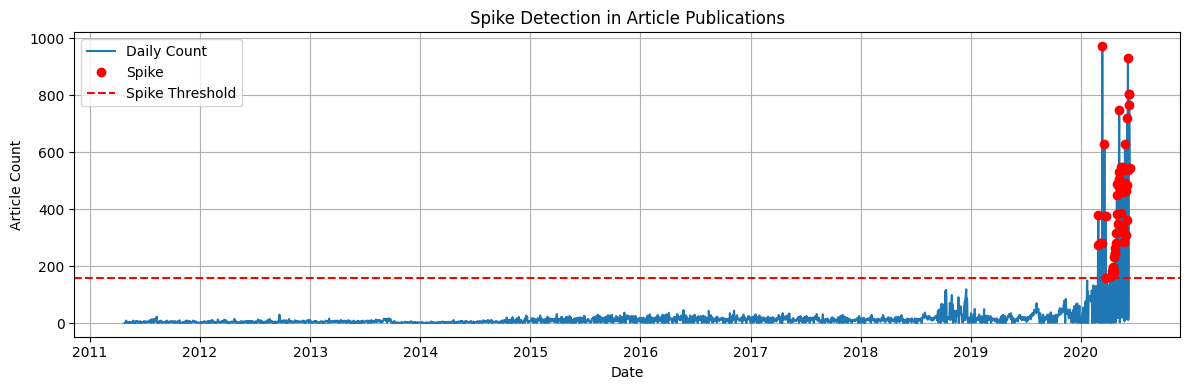

,date,article_count
0,2020-02-27,275
1,2020-02-28,381
2,2020-03-06,281
3,2020-03-11,282
4,2020-03-12,973
5,2020-03-19,629
6,2020-03-23,375
7,2020-03-24,160
8,2020-04-09,164
9,2020-04-13,184


In [ ]:
# It calculates the Z-score for daily article counts.

# Any day where the count exceeds mean + (threshold × std deviation) is marked as a spike.

# Default threshold = 2.0 → top ~5% spikes if data is normally distributed.


analyzer.detect_publication_spikes(df)

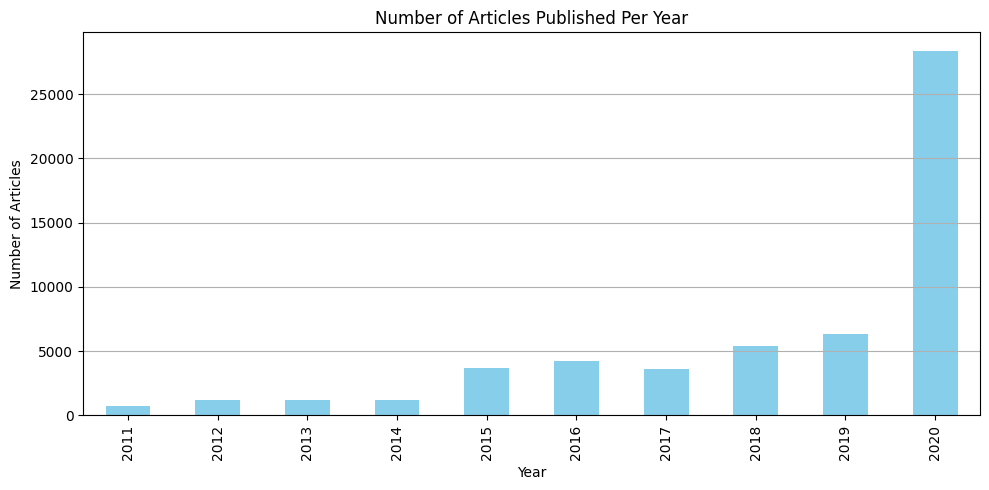

year
2011      760
2012     1187
2013     1240
2014     1189
2015     3695
2016     4223
2017     3581
2018     5395
2019     6325
2020    28392
Name: count, dtype: int64

In [ ]:
analyzer.articles_per_year(df)

c:\Users\girmachew\B5W1_Predicting_Price_Moves_with_News_Sentiment\scripts\RawAnalysis.py:290: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_dist.index, y=hour_dist.values, palette="viridis")


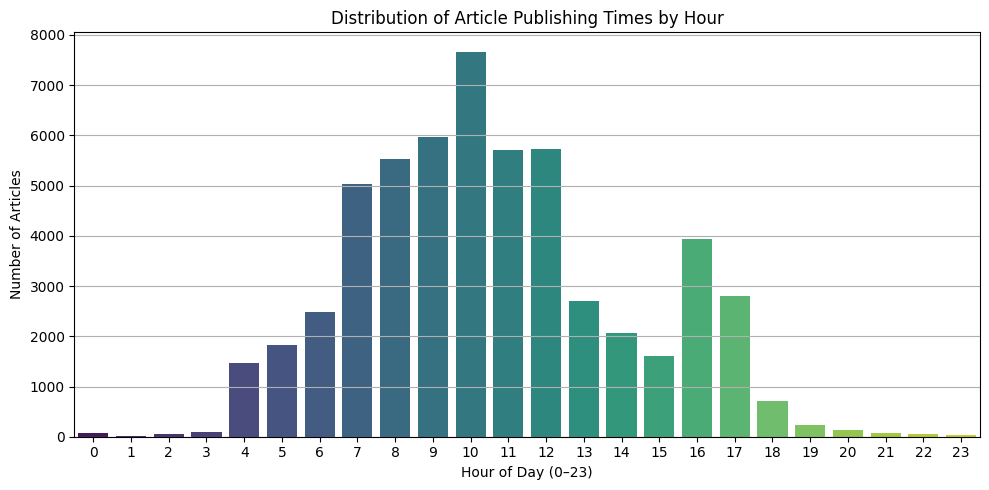

hour
0       67
1       14
2       57
3       93
4     1469
5     1829
6     2476
7     5033
8     5527
9     5965
10    7669
11    5701
12    5732
13    2710
14    2075
15    1612
16    3939
17    2800
18     704
19     227
20     131
21      82
22      48
23      27
Name: count, dtype: int64

In [ ]:
analyzer.publishing_time_distribution(df)

Top 10 publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


c:\Users\girmachew\B5W1_Predicting_Price_Moves_with_News_Sentiment\scripts\RawAnalysis.py:367: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.index, y=publisher_counts.values, palette="Set2")


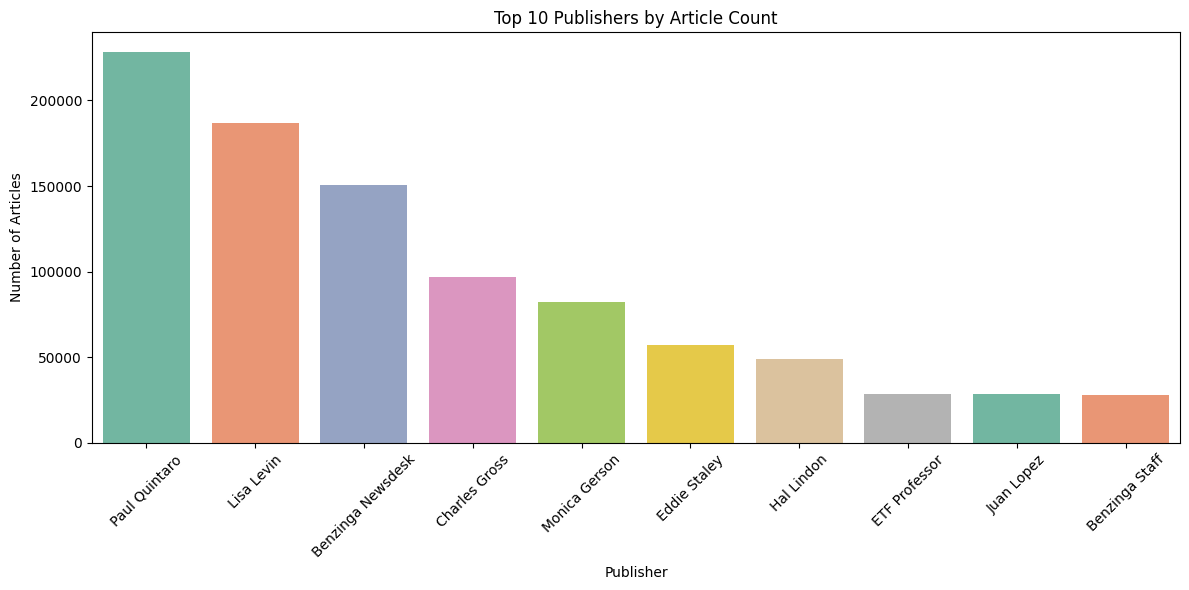


🔹 Top Keywords for Publisher: Paul Quintaro
vs: 86110
est: 82574
eps: 57024
reports: 55267
sales: 31448
shares: 22836
sees: 20735
announces: 20379
00: 18419
pt: 15395

🔹 Top Keywords for Publisher: Lisa Levin
stocks: 68373
market: 50876
mid: 42690
moving: 32324
session: 32324
biggest: 29090
benzinga: 28547
day: 28211
52: 26175
week: 25340

🔹 Top Keywords for Publisher: Benzinga Newsdesk
shares: 42673
trading: 38841
estimate: 29404
stocks: 27844
eps: 27425
sales: 27385
companies: 22019
new: 21465
week: 19759
higher: 19071

🔹 Top Keywords for Publisher: Charles Gross
vs: 16736
option: 15734
alert: 15678
ask: 12082
oi: 11207
ref: 10639
says: 8244
est: 8162
sweep: 8110
calls: 7786

🔹 Top Keywords for Publisher: Monica Gerson
stocks: 24821
earnings: 19528
scheduled: 16625
benzinga: 13791
industry: 13072
highest: 12066
market: 7752
cap: 6651
stock: 5775
futures: 5582

🔹 Top Keywords for Publisher: Eddie Staley
vs: 13236
est: 13019
announces: 10218
eps: 9145
reports: 9035
00: 7941
pt: 6866
s

,article_count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


In [ ]:
analyzer.publisher_contribution_analysis(df)

Top publisher domains:
 domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


c:\Users\girmachew\B5W1_Predicting_Price_Moves_with_News_Sentiment\scripts\RawAnalysis.py:421: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.index, y=domain_counts.values, palette='Blues_d')


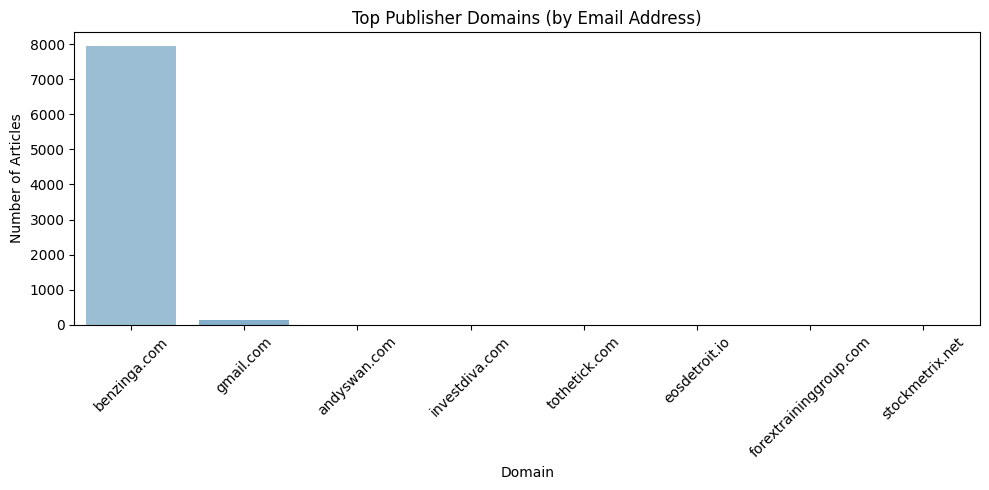

,article_count
domain,
benzinga.com,7937
gmail.com,139
andyswan.com,5
investdiva.com,2
tothetick.com,2
eosdetroit.io,1
forextraininggroup.com,1
stockmetrix.net,1


In [20]:
analyzer.publisher_domain_analysis(df)